In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import ncreate3d as nc
import os
from config import cfg

### Create nozzle geometry. This will export mesh variables

In [23]:
help(nc.NozVars.__init__)

Help on function __init__ in module nCreateMesh:

__init__(self, bathWidth: float = 16, bathHeight: float = 7, bathDepth: float = 7, frontWidth: float = 4, vink: float = 10, vbath: float = 10, npts: int = 50, nozzleInnerWidth: float = 0.603, nozzleThickness: float = 0.152)
    Allowed input variables:
    bathWidth: (default=16) bath width in nozzle inner diameters
    bathHeight: (default=7) bath height in nozzle inner diameters
    bathDepth: (default=7) bath depth  in nozzle inner diameters
    frontWidth: (default=4) front of nozzle bath width  in nozzle inner diameters
    vink: (default=10) ink extrusion speed in mm/s
    vbath: (default=10) bath translation speed in mm/s
    npts: (default=50) number of points in the circle used to define the nozzle
    nozzleInnerWidth: (default=0.603) inner diameter of the nozzle in mm
    nozzleThickness: (default=0.152) nozzle wall thickness in mm



In [31]:
help(nc.genericMesh)

Help on function genericMesh in module ncreate3d:

genericMesh(parentFolder: str, **kwargs) -> ncreate3d.FileGroup
    This generates a folder with mesh and geometry files, but nothing else important. If you want to customize the nozzle, input keyword variables. e.g. genericMesh(myFolder, bathWidth=16)



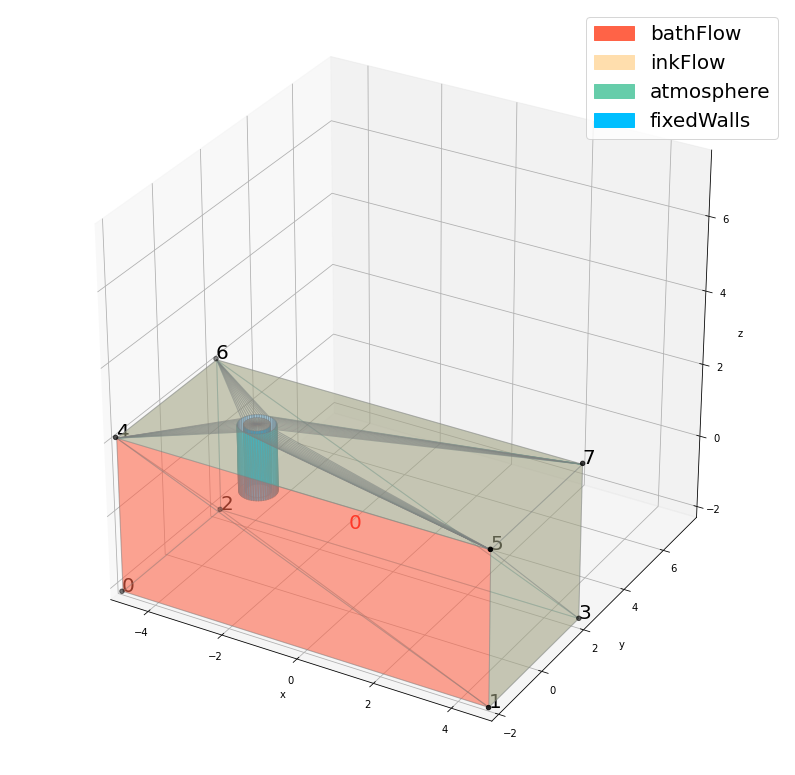

In [34]:
fg = nc.genericMesh(os.path.join(cfg.c, 'parentFolder'), npts=50) # generate mesh files
fg.plot.savefig(os.path.join(cfg.fig, 'dummy', 'nozzleDiagram.png')) # export the diagram of the nozzle

## Generate simulation files

Usage:
<br>e.g. To create a Newtonian fluid of viscosity 1000 Pa s and density 1100 g/mL:
<br>&nbsp;&nbsp;&nbsp;&nbsp;`myFluid = nc.Fluid(nu=1000, rho=1100, units='Pas')`
<br>or to create a Newtonian fluid of viscosity 1000 Pa s and density 1000 g/mL:
<br>&nbsp;&nbsp;&nbsp;&nbsp;`myFluid = nc.Fluid(nu=1000, units='Pa')`
<br>e.g. To create a Herschel-Bulkley fluid of plateau viscosity 4 Pas, yield stress 1 Pa, consistency index 10, power law index 0.5:
<br>&nbsp;&nbsp;&nbsp;&nbsp;`myFluid = nc.Fluid(nu0=4, tau0=1, k=10, n=0.5, units="Pa")`
<br>You can also give the fluid a label, but the label won't be used during file generation. You need to use it separately.
<br>&nbsp;&nbsp;&nbsp;&nbsp;`myFluid = nc.Fluid(label='myLabel', nu0=4, tau0=1, k=10, n=0.5, units="Pa")`
<br><br>
<br>To create a simulation folder, use genericExport.
<br>&nbsp;&nbsp;&nbsp;&nbsp;`nc.genericExport(folderNumber, fluid1, fluid2, surfaceTension, parentFolder, exportMesh=False)`
<br>To create a simulation folder with its own mesh files, use exportMesh=True.
<br>&nbsp;&nbsp;&nbsp;&nbsp;`nc.genericExport(folderNumber, fluid1, fluid2, surfaceTension, parentFolder, exportMesh=True)`

In [13]:
topfolder = os.path.join(cfg.c, 'HBHByielded', 'LapRD') # this is the parent folder that holds everything
ii = 1100
sigma = 0

LapRD225 = nc.Fluid(units="Pa", label=225, tau0=0.21394, k=3.248436, n=0.14201, nu0=4.05384)
LapRD250 = nc.Fluid(units="Pa", label=250, tau0=0.82365, k=9.692119, n=0.112515, nu0=11.8239)
LapRD275 = nc.Fluid(units="Pa", label=275, tau0=2.07291, k=22.74276, n=0.054603, nu0=22.6813)
LapRD300 = nc.Fluid(units="Pa", label=300, tau0=6.72765, k=75.69318, n=0.022874, nu0=73.66575)
LapRD350 = nc.Fluid(units="Pa", label=350, tau0=26.8672, k=182.7635, n=-0.01779, nu0=99.1863)
LapRD400 = nc.Fluid(units="Pa", label=400, tau0=93.9063, k=181.8893, n=0.021436, nu0=219.404)

inks = [LapRD225, LapRD250, LapRD275, LapRD300, LapRD350, LapRD400]

for link in inks:
    for lsup in inks:
        nc.genericExport(ii, lsup, link, sigma, topfolder, exportMesh=False)
        
        # create an additional file that notes the fluid labels
        name = 'I_'+'{:.2f}'.format(lsup.label/100)+'_S_'+'{:.2f}'.format(link.label/100)
        nc.exportFile(os.path.join(topfolder, 'nb'+str(ii)), name+'.txt', name)
        
        ii+=1

Created directory C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\LapRD\nb1100
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\LapRD\nb1100\case
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\LapRD\nb1100\case\0
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\LapRD\nb1100\case\constant
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\LapRD\nb1100\case\system
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\LapRD\nb1100\geometry.csv
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\LapRD\nb1100\case\Allclean
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\LapRD\nb1100\case\Allrun
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\LapRD\nb1100\case\Continue
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\LapRD\nb1100\case\0\alpha.ink.orig
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\LapRD\nb1100\case\0\alpha.ink
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded

In [27]:
cfolder = r'C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\LapRD'
for f in os.listdir(cfolder):
    if f.startswith('nb') and not f.startswith('nb1100') and not f.startswith('nb1101'):
        allrun = nc.compileAllRun(f, 'interFoam')
        nc.exportFile(os.path.join(cfolder, f, 'case'), 'Allrun.sh', allrun, linux=True)
        slurm = nc.compileSlurm(f, r'/home/lmf1/openfoam/LapRD')
        nc.exportFile(os.path.join(cfolder, f, 'case'), 'run.slurm', slurm, linux=True)